In [ ]:
## **AGRI PROJECT**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [1]:
import pymysql

conn = pymysql.connect(
    host="localhost",
    user="root",
    password="deen1234",
    database="Agriculturedata"
)
#cursor= conn.cursor()

print("PyMySQL connection established!")


PyMySQL connection established!


In [ ]:
#SQL QUERY 

In [7]:
dfagri=pd.read_csv("C:/Users/manso/Downloads/AGRI PROJECT GUVI/paddyproject.csv")

In [3]:
dfagri.head(7)

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
5,1,1971,14,Chhattisgarh,Durg,581.8,412.9,709.69,44.4,25.8,...,2000.00,0.0,0.0,0.0,5.42,7.48,12.91,0.01,0.54,0.38
6,1,1972,14,Chhattisgarh,Durg,582.2,381.0,654.41,39.6,20.6,...,2000.00,0.0,0.0,0.0,5.48,7.53,13.01,0.01,0.55,0.26


In [ ]:
## DATA PREPROCESSING

In [13]:
dfagri.isnull().sum()

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [ ]:
##  VISUALIZE

C:\Users\manso\AppData\Local\Temp\ipykernel_6420\1160570032.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df.index,y=df.values,palette="dark")


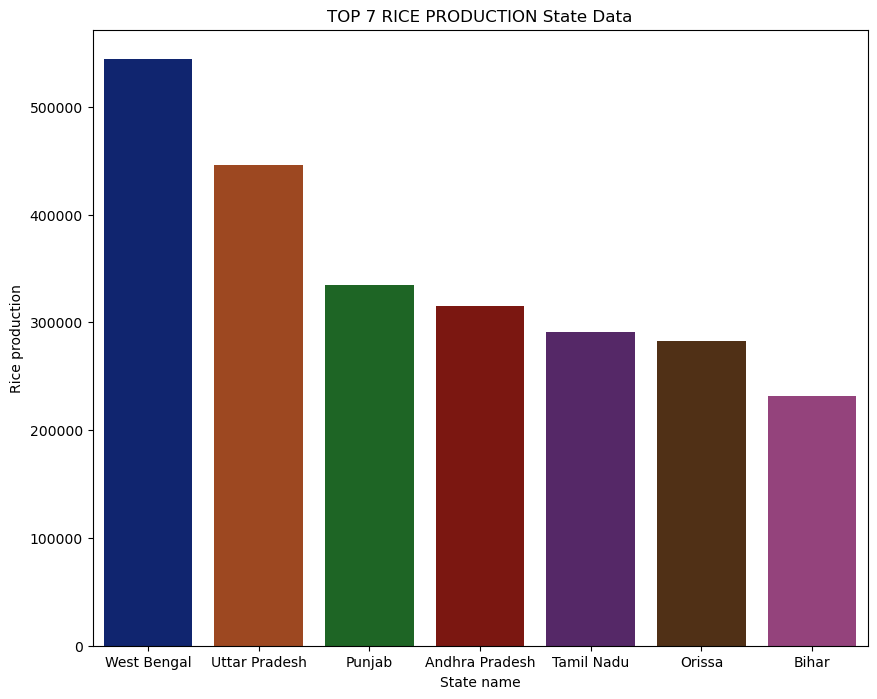

In [19]:
## TOP 7 RICE PRODUCTION
df=dfagri.groupby("State Name")["RICE PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(7)
plt.figure(figsize=(10,8))
sns.barplot(x= df.index,y=df.values,palette="dark")
plt.title("TOP 7 RICE PRODUCTION State Data")
plt.xlabel("State name")
plt.ylabel("Rice production")
plt.show()

In [ ]:
##BAR CHAT AND PIE CHART#
# Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)


C:\Users\manso\AppData\Local\Temp\ipykernel_15688\1003079178.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.index,y = df.values,palette="dark")


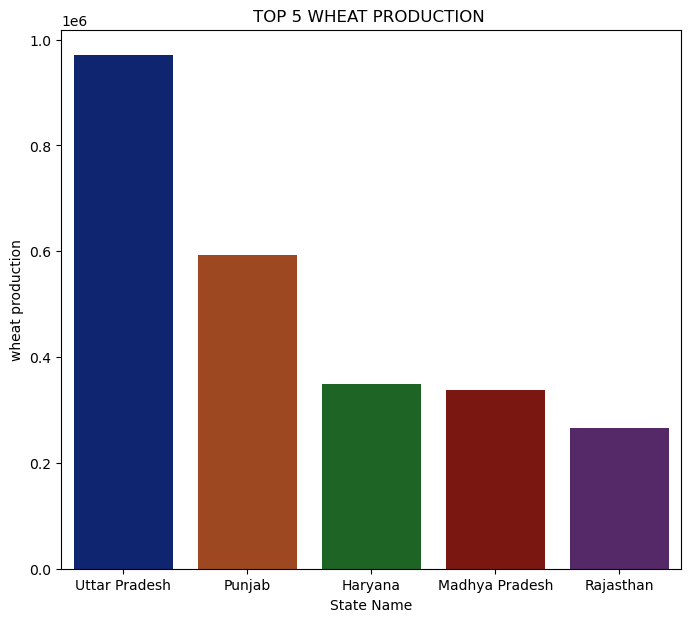

In [3]:
## ** TOP FIVE WHEAT PRODUCTON IN BAR CHART **
df=dfagri.groupby("State Name")["WHEAT PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,7))
sns.barplot(x = df.index,y = df.values,palette="dark")
plt.xlabel("State Name")
plt.ylabel("wheat production")
plt.title("TOP 5 WHEAT PRODUCTION ")
plt.show()


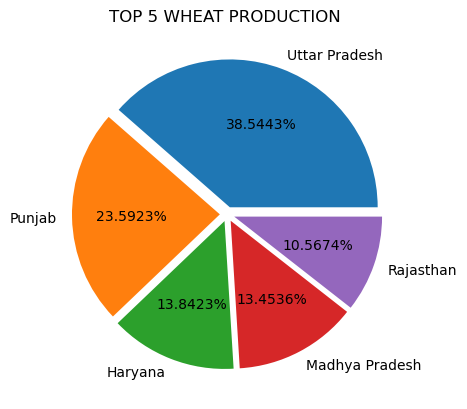

In [18]:
## TOP FIVE WHEAT PRODUCTION  STATE PERCENTAGE (%) PIE CHART
plt.title("TOP 5 WHEAT PRODUCTION ")
df=dfagri.groupby("State Name")["WHEAT PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(5)
explode=(0.05,0.05,0.05,0.05,0.05)
plt.pie(df.values,explode=explode,labels=df.index,autopct= "%1.4f%%")
plt.show()

In [ ]:
## ** OIL SEED PRODUCTION BY TOP 5 **

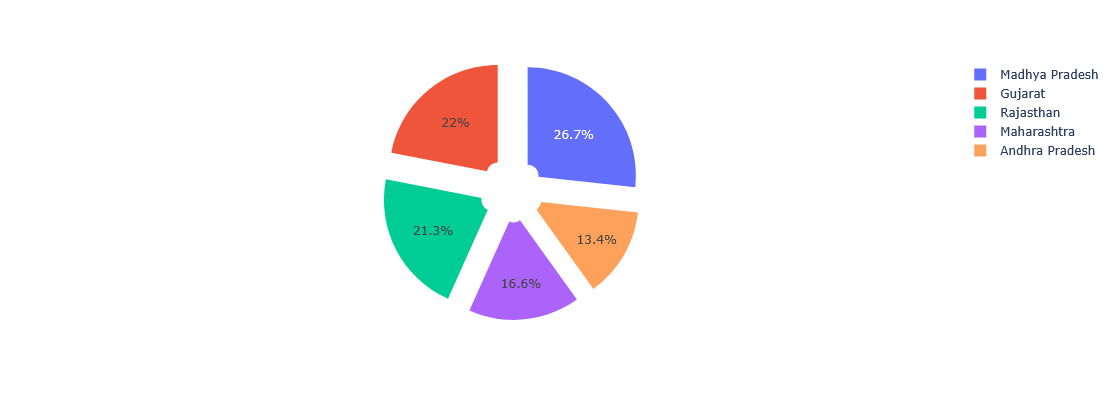

In [21]:

df=dfagri.groupby("State Name")["OILSEEDS PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(5)
pt = px.pie(
    values = df.values,
    names = df.index,
    width = 500,
    height= 400,
    hole = 0.1
)
pt.update_traces(pull = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2])
pt.show()

In [ ]:
# STATE TOP SEVEN SUNFLOWER PRODUCTION 

C:\Users\manso\AppData\Local\Temp\ipykernel_36444\3598138609.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




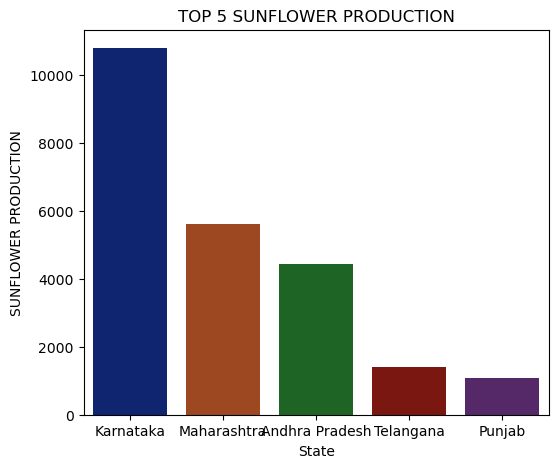

In [7]:

df=dfagri.groupby("State Name")["SUNFLOWER PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(6,5))
sns.barplot(x=df.index,y=df.values,palette="dark")
plt.xlabel("State")
plt.ylabel("SUNFLOWER PRODUCTION")
plt.title("TOP 5 SUNFLOWER PRODUCTION")
plt.show()

In [ ]:
## **** SUGARCANE PRODUCTION LAST 50 YEARS ****

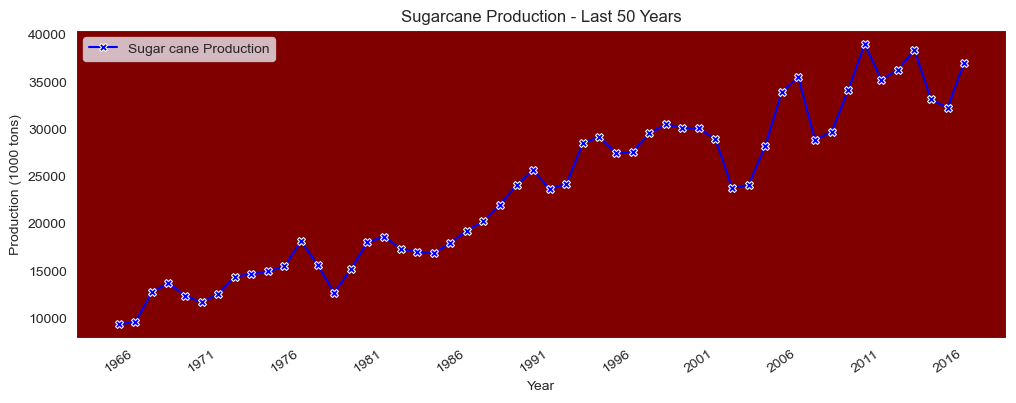

In [5]:
 # GRROUP BY YEAR AND SUM PORDUCTION
df = df.sort_index().tail(50) # Keep last 50 years
df = dfagri.groupby("Year")["SUGARCANE PRODUCTION (1000 tons)"].sum()
Year = df.reset_index()# Reset index so Year is a column
sns.set_style("dark")
plot , ax = plt.subplots(figsize= (12,4))
ax.set_facecolor("maroon")

sns.lineplot(data=Year, x="Year", y="SUGARCANE PRODUCTION (1000 tons)",
             marker='X', color='blue', label='Sugar cane Production')   
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.title("Sugarcane Production - Last 50 Years")

plt.xticks(Year["Year"][::5], rotation=35)

plt.legend()
plt.show()

In [ ]:
## RICE AND WHEAT LAST 50 YEARS

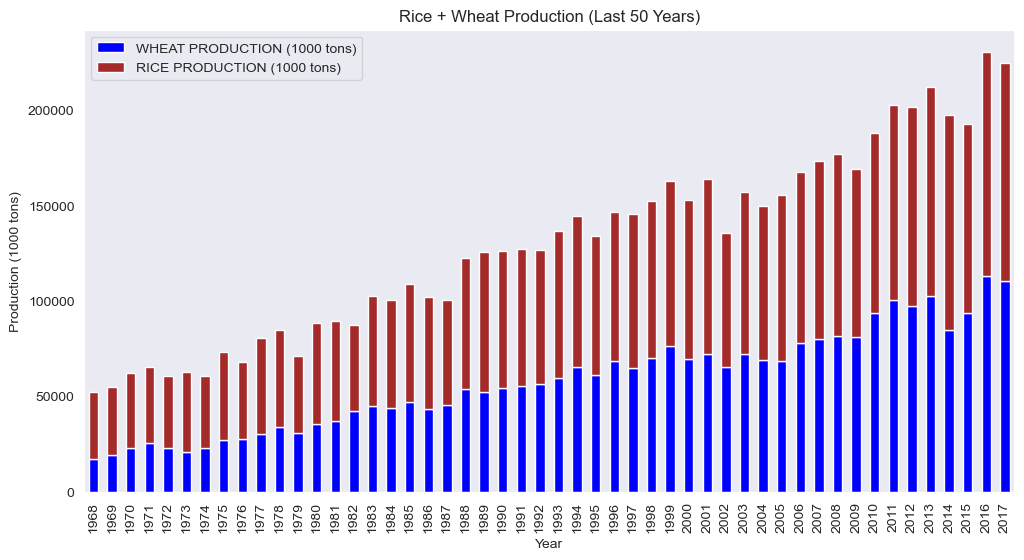

In [6]:
df= dfagri.groupby("Year")[["WHEAT PRODUCTION (1000 tons)","RICE PRODUCTION (1000 tons)"]].sum().reset_index().tail(50)
axi = df.plot(
    x="Year",
    kind="bar",
    stacked=True,
    figsize=(12,6),
    color=["blue", "brown",]
)

plt.title("Rice + Wheat Production (Last 50 Years)")
plt.ylabel("Production (1000 tons)")
plt.show()

In [ ]:
# ** Rice Production By West Bengal Districts **

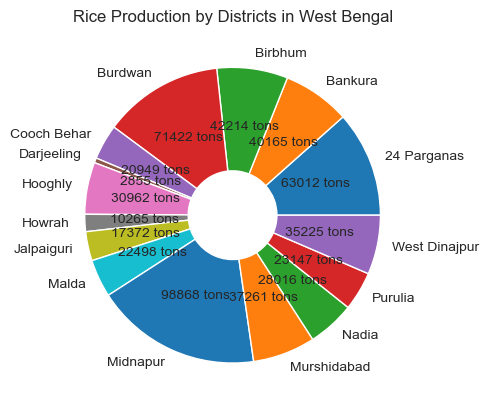

In [16]:
df = dfagri[dfagri["State Name"]=="West Bengal"].groupby("Dist Name")["RICE PRODUCTION (1000 tons)"].sum()
df = df[df > 0].dropna()
def absolute_value(val):
    total = sum(df.values)
    absolute = int(round(val/100*total, 0))  
    return f"{absolute} tons"
plt.pie(
    df.values,
    labels=df.index,
    autopct=absolute_value,
    wedgeprops={"width":0.7}  
)

total_sum = df.sum()

plt.title("Rice Production by Districts in West Bengal")

plt.show()

In [ ]:
# ** TOP 10 WHEAT PRODUCTION Top 10 Wheat Production Years From Uttar Pradesh **

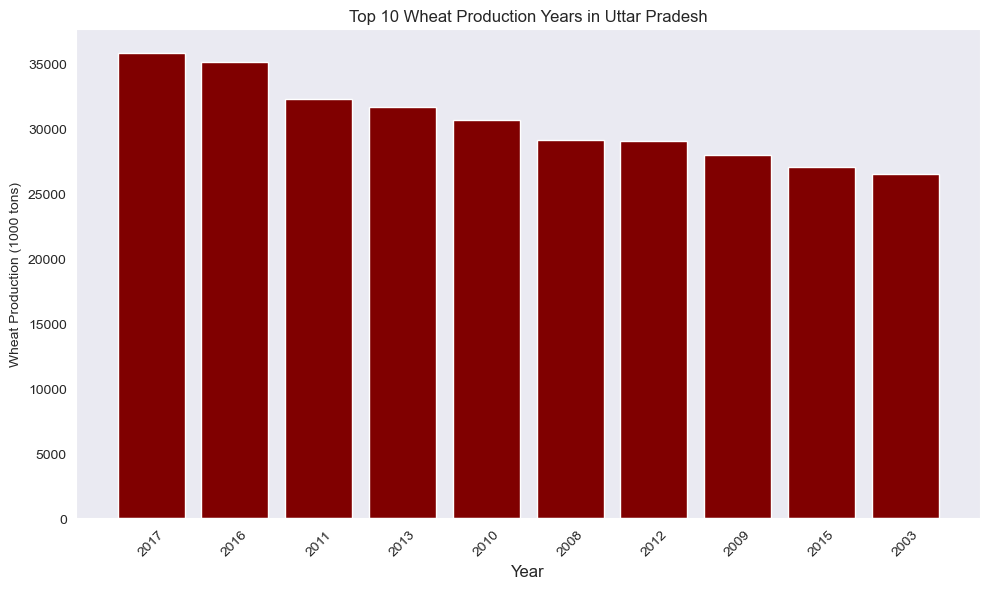

In [18]:

up_data = dfagri[dfagri["State Name"].str.contains("Uttar Pradesh", case=False, na=False)]
# Group by year and sum wheat production across districts
up_wheat_by_year = up_data.groupby("Year")["WHEAT PRODUCTION (1000 tons)"].sum().reset_index()
# Get top 10 years
top10_wheat_years = up_wheat_by_year.sort_values(by="WHEAT PRODUCTION (1000 tons)", ascending=False).head(10)
# Plot
plt.figure(figsize=(10,6))
plt.bar(top10_wheat_years["Year"].astype(str), top10_wheat_years["WHEAT PRODUCTION (1000 tons)"], color="maroon")
plt.title("Top 10 Wheat Production Years in Uttar Pradesh", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Wheat Production (1000 tons)", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
#Pearl Millet and Finger Millet production

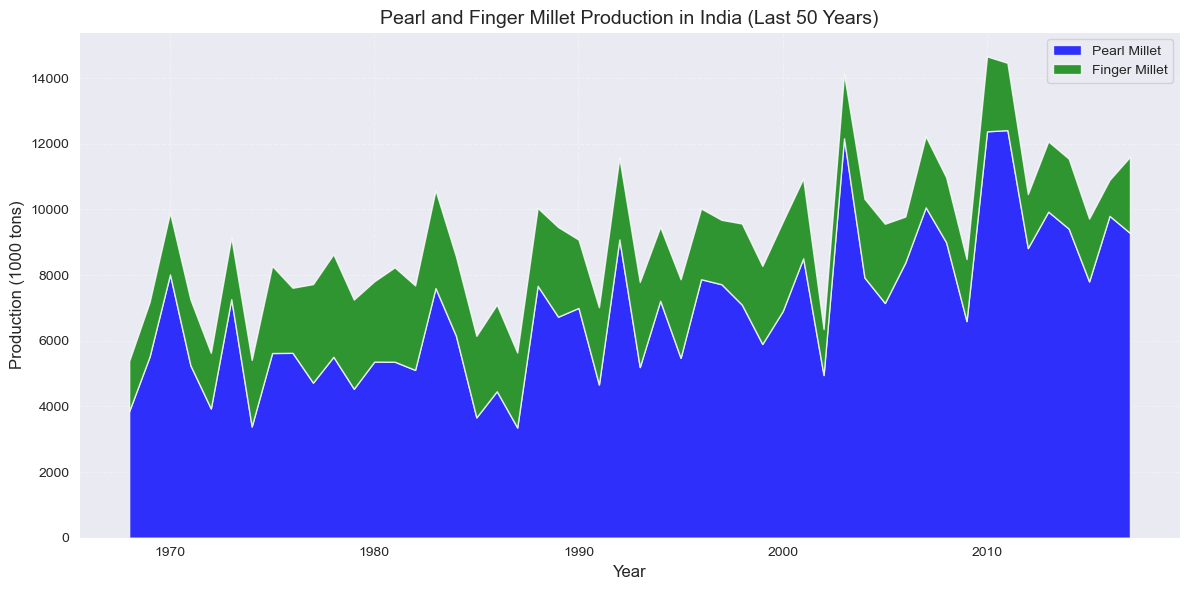

In [13]:

millets = dfagri.groupby("Year")[[
    "PEARL MILLET PRODUCTION (1000 tons)",
    "FINGER MILLET PRODUCTION (1000 tons)"
]].sum().reset_index().tail(50)

# Plot stacked area chart
plt.figure(figsize=(12,6))
plt.stackplot(
    millets["Year"],
    millets["PEARL MILLET PRODUCTION (1000 tons)"],
    millets["FINGER MILLET PRODUCTION (1000 tons)"],
    labels=["Pearl Millet", "Finger Millet"],
    colors=["blue", "green"],
    alpha=0.8
)

plt.title("Pearl and Finger Millet Production in India (Last 50 Years)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Production (1000 tons)", fontsize=12)
plt.legend(loc="upper right")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

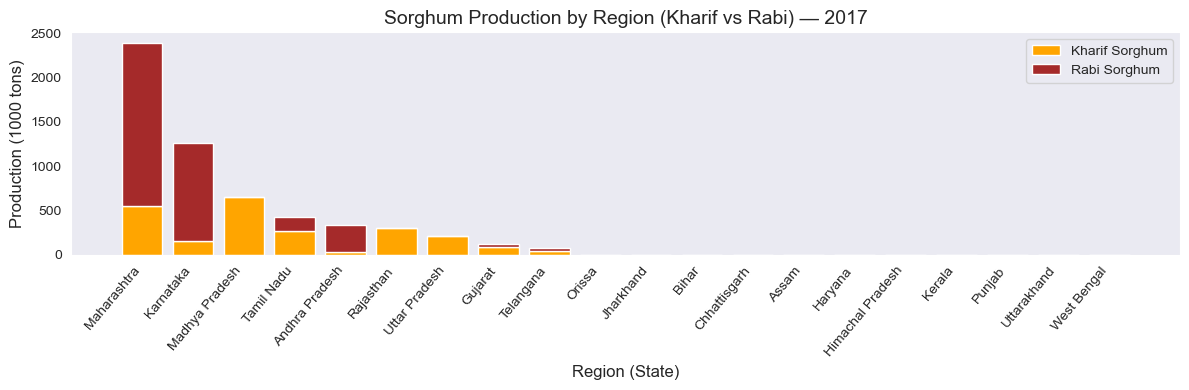

In [100]:
#Sorghum Production (Kharif and Rabi) by Region
latest_year = dfagri["Year"].max()
sorghum_latest = dfagri[dfagri["Year"] == latest_year]

sorghum_region = sorghum_latest.groupby("State Name")[[
    "KHARIF SORGHUM PRODUCTION (1000 tons)",
    "RABI SORGHUM PRODUCTION (1000 tons)"
]].sum().reset_index()

# Sort by total sorghum production
sorghum_region["TOTAL"] = sorghum_region["KHARIF SORGHUM PRODUCTION (1000 tons)"] + sorghum_region["RABI SORGHUM PRODUCTION (1000 tons)"]
sorghum_region = sorghum_region.sort_values(by="TOTAL", ascending=False)

# Plot stacked bar chart
plt.figure(figsize=(12,4))
plt.bar(sorghum_region["State Name"], sorghum_region["KHARIF SORGHUM PRODUCTION (1000 tons)"], label="Kharif Sorghum", color="orange")
plt.bar(sorghum_region["State Name"], sorghum_region["RABI SORGHUM PRODUCTION (1000 tons)"],
        bottom=sorghum_region["KHARIF SORGHUM PRODUCTION (1000 tons)"], label="Rabi Sorghum", color="brown")

plt.title(f"Sorghum Production by Region (Kharif vs Rabi) — {latest_year}", fontsize=14)
plt.xlabel("Region (State)", fontsize=12)
plt.ylabel("Production (1000 tons)", fontsize=12)
plt.xticks(rotation=50, ha="right")
plt.legend()
plt.tight_layout()

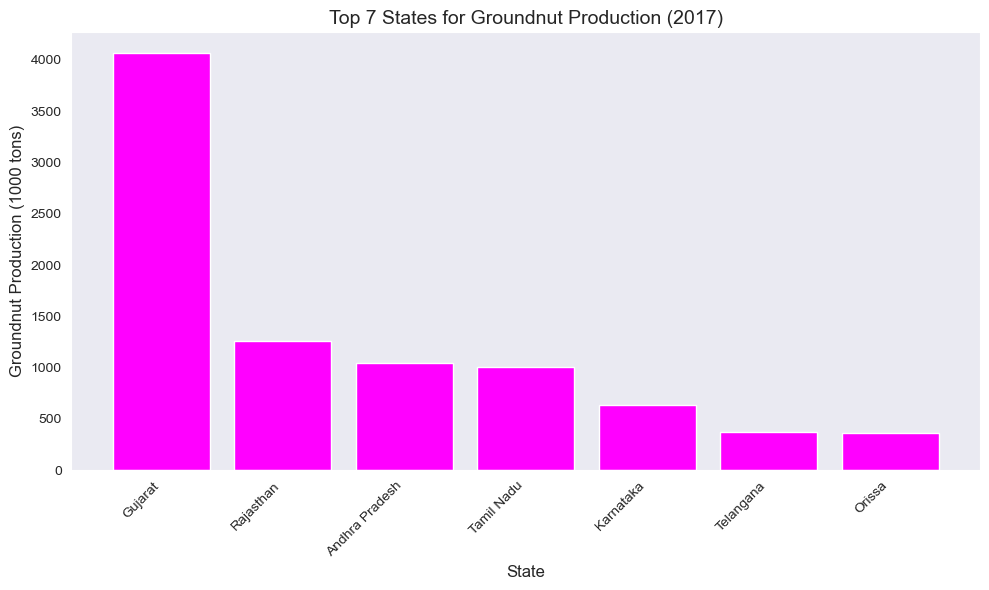

In [102]:
#Top 7 States for Groundnut Production.
latest_year = dfagri["Year"].max()
groundnut_latest = dfagri[dfagri["Year"] == latest_year]

# Group by State and sum groundnut production
groundnut_state = groundnut_latest.groupby("State Name")["GROUNDNUT PRODUCTION (1000 tons)"].sum().reset_index()

# Get top 7 states
top7_groundnut = groundnut_state.sort_values(by="GROUNDNUT PRODUCTION (1000 tons)", ascending=False).head(7)

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(top7_groundnut["State Name"], top7_groundnut["GROUNDNUT PRODUCTION (1000 tons)"], color="magenta")
plt.title(f"Top 7 States for Groundnut Production ({latest_year})", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Groundnut Production (1000 tons)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

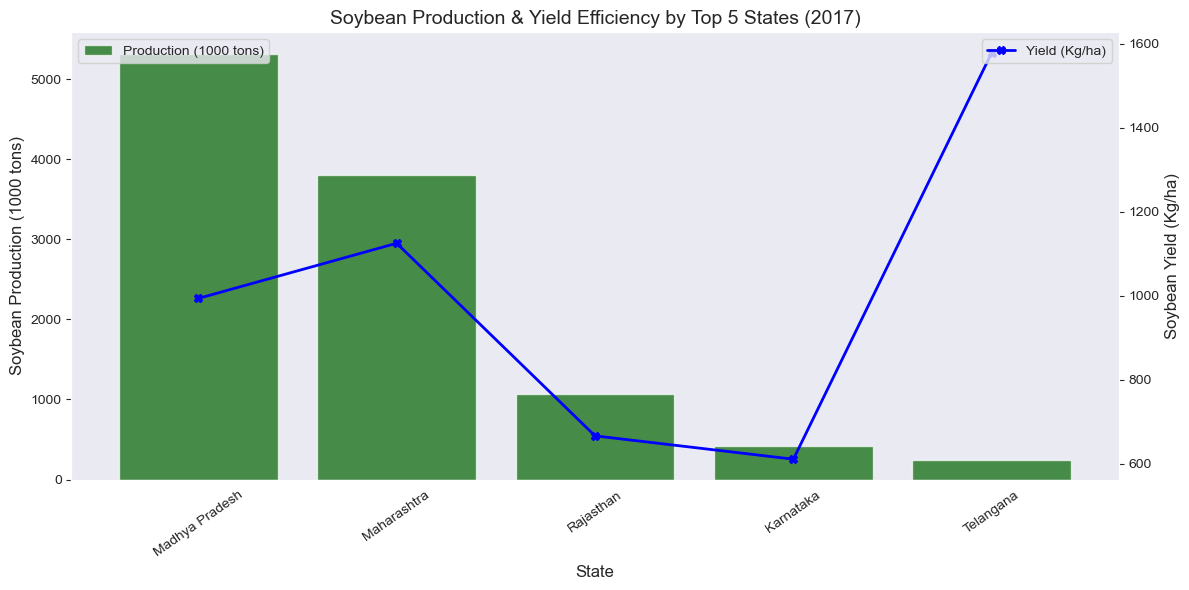

In [108]:
#Soybean Production by Top 5 States and Yield Efficiency

latest_year = dfagri["Year"].max()
soy_latest = dfagri[dfagri["Year"] == latest_year]

# Group by State and sum production + area, take mean yield
soy_state = soy_latest.groupby("State Name").agg({
    "SOYABEAN PRODUCTION (1000 tons)": "sum",
    "SOYABEAN AREA (1000 ha)": "sum",
    "SOYABEAN YIELD (Kg per ha)": "mean"
}).reset_index()

# Get top 5 states by production
top5_soy = soy_state.sort_values(by="SOYABEAN PRODUCTION (1000 tons)", ascending=False).head(5)

# --- Plotting ---
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for production
ax1.bar(top5_soy["State Name"], top5_soy["SOYABEAN PRODUCTION (1000 tons)"], color="darkgreen", alpha=0.7, label="Production (1000 tons)")
ax1.set_ylabel("Soybean Production (1000 tons)", fontsize=12)
ax1.set_xlabel("State", fontsize=12)

# Line chart for yield efficiency
ax2 = ax1.twinx()
ax2.plot(top5_soy["State Name"], top5_soy["SOYABEAN YIELD (Kg per ha)"], color="blue", marker="X", linewidth=2, label="Yield (Kg/ha)")
ax2.set_ylabel("Soybean Yield (Kg/ha)", fontsize=12)

# Title & formatting
plt.title(f"Soybean Production & Yield Efficiency by Top 5 States ({latest_year})", fontsize=14)
ax1.tick_params(axis="x", rotation=35)
fig.tight_layout()

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

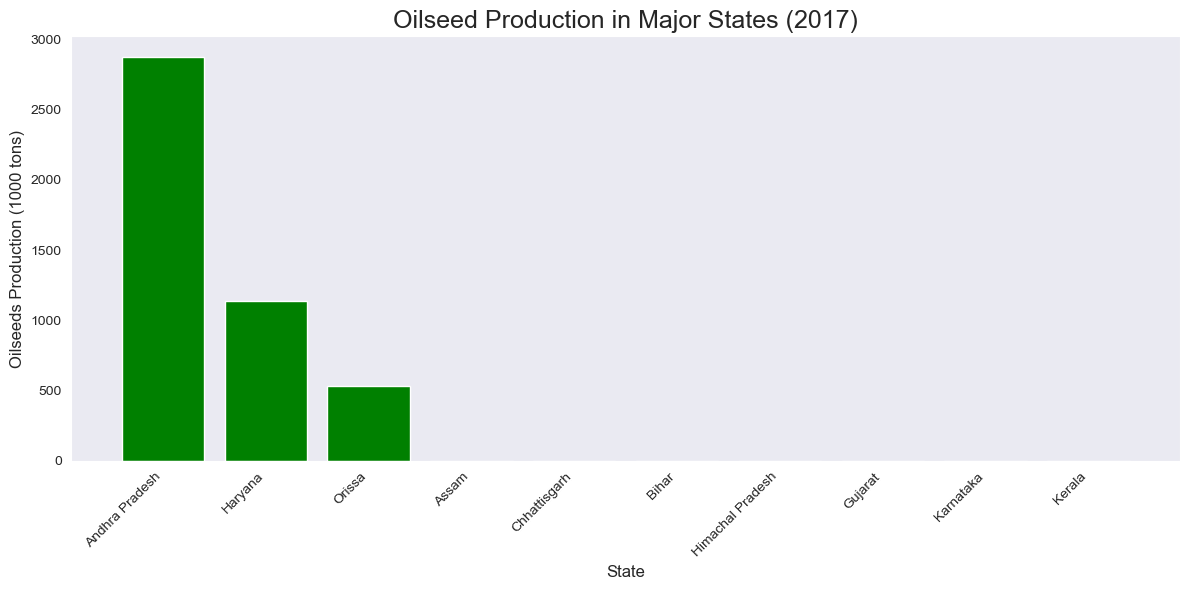

In [113]:
#Oilseed Production in Major States
latest_year = dfagri["Year"].max()
oilseeds_latest = dfagri[dfagri["Year"] == latest_year]

# Group by State for total oilseed production
oilseed_state = oilseeds_latest.groupby("State Name")["OILSEEDS PRODUCTION (1000 tons)"].sum().reset_index()

# Sort states by production
oilseed_state = oilseed_state.sort_values(by="OILSEEDS PRODUCTION (1000 tons)", ascending=False)

# Pick major states (top 10)
major_states = oilseed_state.head(10)

# Plot
plt.figure(figsize=(12,6))
plt.bar(major_states["State Name"], major_states["OILSEEDS PRODUCTION (1000 tons)"], color="green")
plt.title(f"Oilseed Production in Major States ({latest_year})", fontsize=18)
plt.xlabel("State", fontsize=12)
plt.ylabel("Oilseeds Production (1000 tons)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

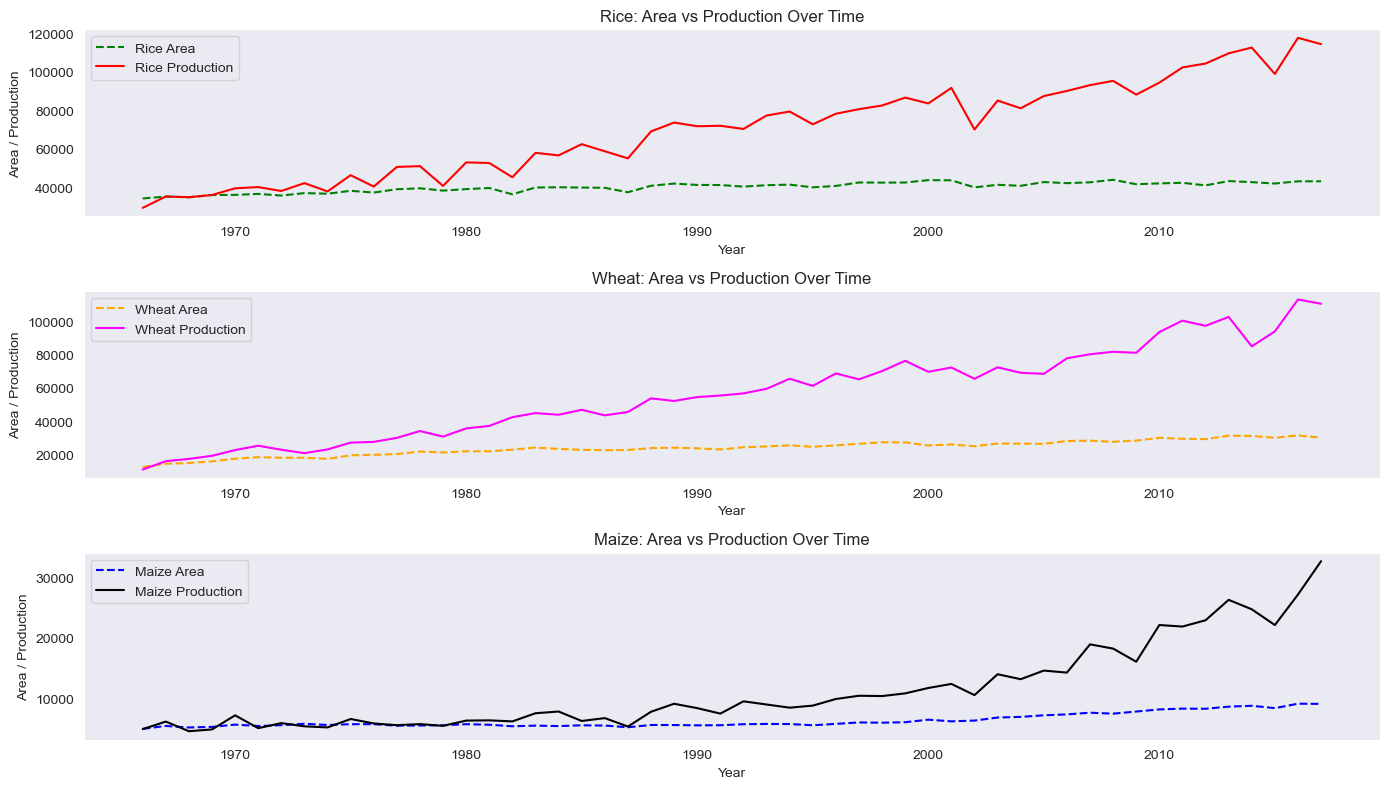

In [121]:
#Impact of Area Cultivated on Production (Rice, Wheat, Maize)
crops_over_time = dfagri.groupby("Year").agg({
    "RICE AREA (1000 ha)": "sum",
    "RICE PRODUCTION (1000 tons)": "sum",
    "WHEAT AREA (1000 ha)": "sum",
    "WHEAT PRODUCTION (1000 tons)": "sum",
    "MAIZE AREA (1000 ha)": "sum",
    "MAIZE PRODUCTION (1000 tons)": "sum"
}).reset_index()

# --- Plot ---
plt.figure(figsize=(14,8))

# Rice
plt.subplot(3,1,1)
plt.plot(crops_over_time["Year"], crops_over_time["RICE AREA (1000 ha)"], label="Rice Area", color="green", linestyle="--")
plt.plot(crops_over_time["Year"], crops_over_time["RICE PRODUCTION (1000 tons)"], label="Rice Production", color="red")
plt.title("Rice: Area vs Production Over Time")
plt.xlabel("Year")
plt.ylabel("Area / Production")
plt.legend()

# Wheat
plt.subplot(3,1,2)
plt.plot(crops_over_time["Year"], crops_over_time["WHEAT AREA (1000 ha)"], label="Wheat Area", color="orange", linestyle="--")
plt.plot(crops_over_time["Year"], crops_over_time["WHEAT PRODUCTION (1000 tons)"], label="Wheat Production", color="magenta")
plt.title("Wheat: Area vs Production Over Time")
plt.xlabel("Year")
plt.ylabel("Area / Production")
plt.legend()

# Maize
plt.subplot(3,1,3)
plt.plot(crops_over_time["Year"], crops_over_time["MAIZE AREA (1000 ha)"], label="Maize Area", color="blue", linestyle="--")
plt.plot(crops_over_time["Year"], crops_over_time["MAIZE PRODUCTION (1000 tons)"], label="Maize Production", color="black")
plt.title("Maize: Area vs Production Over Time")
plt.xlabel("Year")
plt.ylabel("Area / Production")
plt.legend()

plt.tight_layout()
plt.show()

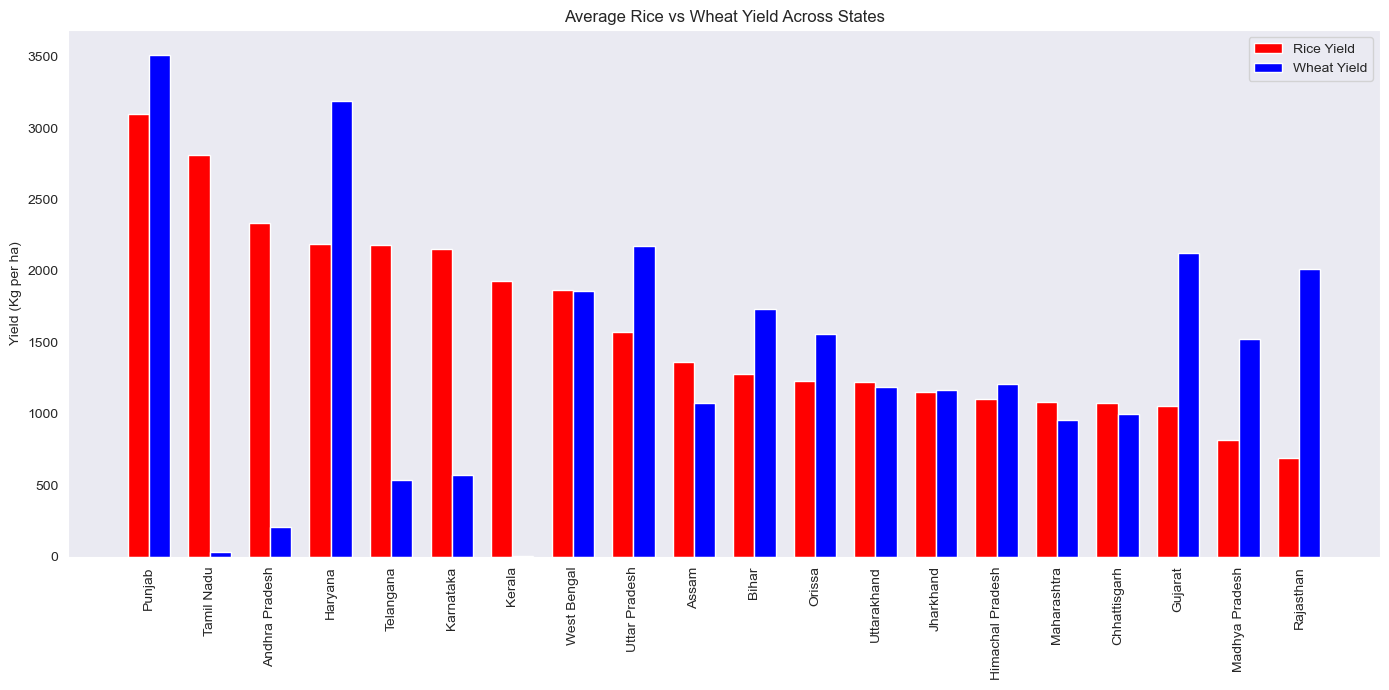

In [119]:

# Group by state and calculate average Rice and Wheat yield
yield_state = dfagri.groupby("State Name")[["RICE YIELD (Kg per ha)", "WHEAT YIELD (Kg per ha)"]].mean().reset_index()

# Sort by Rice yield for better visualization
yield_state = yield_state.sort_values("RICE YIELD (Kg per ha)", ascending=False)

# Bar chart with side-by-side comparison
x = np.arange(len(yield_state["State Name"]))  # state positions
width = 0.35  # bar width

plt.figure(figsize=(14,7))
plt.bar(x - width/2, yield_state["RICE YIELD (Kg per ha)"], width, label="Rice Yield",color= 'red')
plt.bar(x + width/2, yield_state["WHEAT YIELD (Kg per ha)"], width, label="Wheat Yield",color='blue')

plt.xticks(x, yield_state["State Name"], rotation=90)
plt.ylabel("Yield (Kg per ha)")
plt.title("Average Rice vs Wheat Yield Across States")
plt.legend()
plt.tight_layout()
plt.show()